**классификатор изображений на основе VGG16**

Евгений Борисов <esborisov@sevsu.ru>

---

VERY DEEP CONVOLUTIONAL NETWORKS FOR LARGE-SCALE IMAGE RECOGNITION   
Karen Simonyan, Andrew Zisserman    
Visual Geometry Group, Department of Engineering Science, University of Oxford   

https://arxiv.org/pdf/1409.1556.pdf

---

In [1]:
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt

## модель

In [2]:
import tensorflow as tf

tf.__version__, tf.keras.__version__

2023-05-19 14:06:32.312254: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-19 14:06:32.345342: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-19 14:06:32.346240: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-19 14:06:32.950647: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


('2.12.0', '2.12.0')

In [ ]:
# https://www.tensorflow.org/install/gpu

In [ ]:
# conda install -c conda-forge cudatoolkit=11.8.0
# python3 -m pip install nvidia-cudnn-cu11==8.6.0.163 tensorflow==2.12.*
# mkdir -p $CONDA_PREFIX/etc/conda/activate.d
# echo 'CUDNN_PATH=$(dirname $(python -c "import nvidia.cudnn;print(nvidia.cudnn.__file__)"))' >> $CONDA_PREFIX/etc/conda/activate.d/env_vars.sh
# echo 'export LD_LIBRARY_PATH=$LD_LIBRARY_PATH:$CONDA_PREFIX/lib/:$CUDNN_PATH/lib' >> $CONDA_PREFIX/etc/conda/activate.d/env_vars.sh
# source $CONDA_PREFIX/etc/conda/activate.d/env_vars.sh
# # Verify install:
# python3 -c "import tensorflow as tf; print(tf.config.list_physical_devices('GPU'))"

In [ ]:
# pip install nvidia-cudnn-cu11==8.6.0.163

# CUDNN_PATH=$(dirname $(python -c "import nvidia.cudnn;print(nvidia.cudnn.__file__)"))
# export LD_LIBRARY_PATH=$LD_LIBRARY_PATH:$CONDA_PREFIX/lib/:$CUDNN_PATH/lib
        
# mkdir -p $CONDA_PREFIX/etc/conda/activate.d
# echo 'CUDNN_PATH=$(dirname $(python -c "import nvidia.cudnn;print(nvidia.cudnn.__file__)"))' >> $CONDA_PREFIX/etc/conda/activate.d/env_vars.sh
# echo 'export LD_LIBRARY_PATH=$LD_LIBRARY_PATH:$CONDA_PREFIX/lib/:$CUDNN_PATH/lib' >> $CONDA_PREFIX/etc/conda/activate.d/env_vars.sh        

In [8]:
# import nvidia.cudnn
# display(nvidia.cudnn.__file__)

In [6]:
# # import tensorflow as tf
# display(tf.config.list_physical_devices('GPU'))

[]

## загружаем модель

In [3]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.utils import plot_model

In [4]:
# ~/.keras/models
# 250MB
# https://storage.googleapis.com/tensorflow/keras-applications/vgg16/vgg16_weights_tf_dim_ordering_tf_kernels.h5

In [5]:
model = VGG16() # автозагрузка весов

2023-05-19 14:06:37.432482: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-19 14:06:37.665368: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


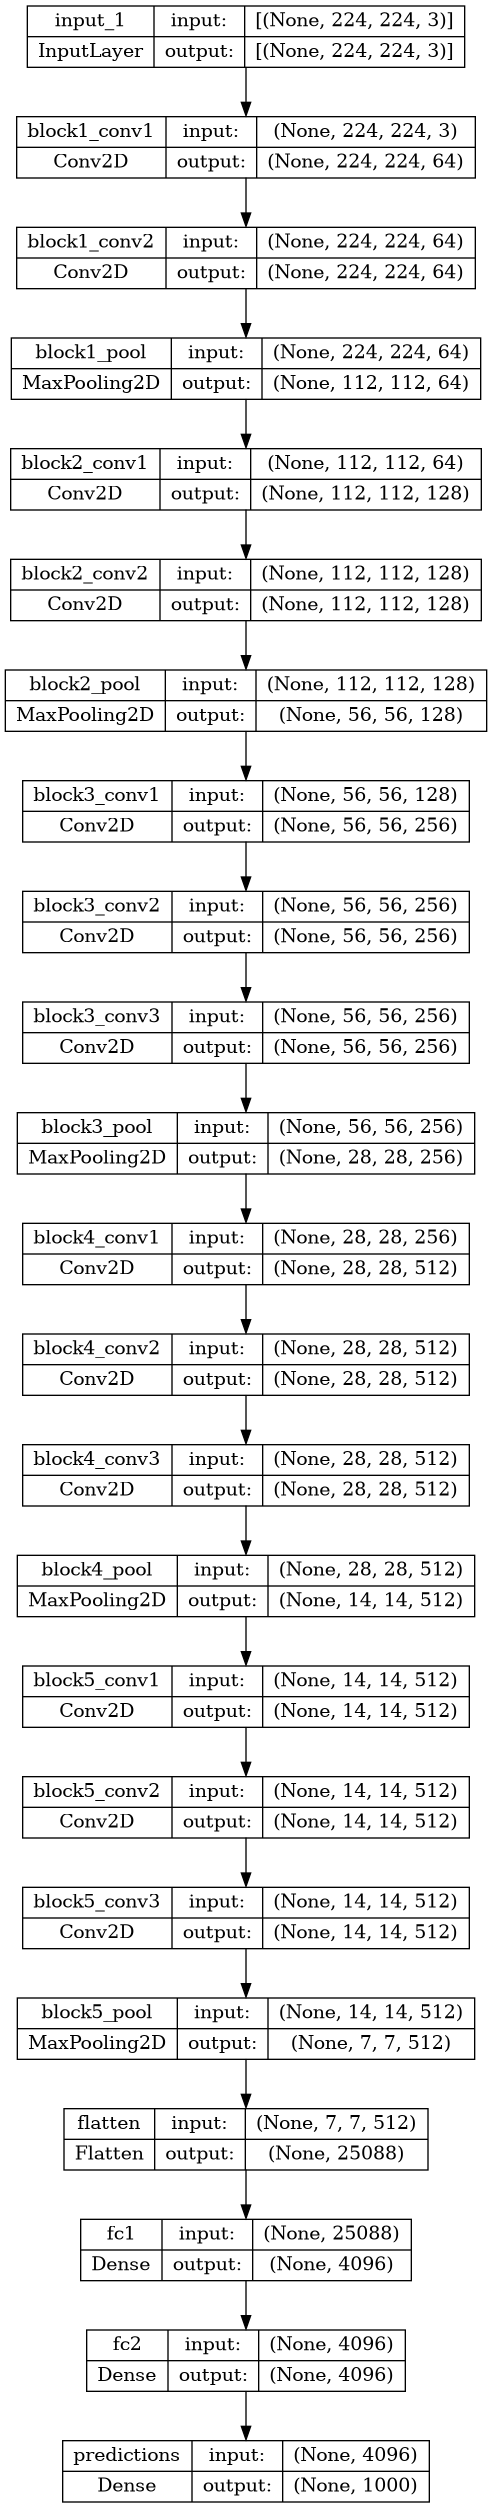

In [6]:
plot_model(model, to_file='vgg16.png', show_layer_names=True, show_shapes=True )

## тестируем

данные https://disk.yandex.ru/d/KEZSpmlzTekTgw

In [7]:
# # имена классов imagenet1000
# !wget ../data/imagenet -c https://gist.githubusercontent.com/yrevar/942d3a0ac09ec9e5eb3a/raw/238f720ff059c1f82f368259d1ca4ffa5dd8f9f5/imagenet1000_clsidx_to_labels.txt

In [8]:
# http://www.image-net.org

with open('../data/imagenet/imagenet1000_clsidx_to_labels.txt', 'rt') as f:   
    imagenet_labels = eval(f.read())

with open('../data/imagenet/photos/index.txt', 'rt') as f: 
    files = [ s for s in f.read().split('\n') if s ]

def image2arr(im):
    return np.array(im.resize([224,224,]).convert('RGB')).astype(np.float32)[np.newaxis,:]

x = np.vstack([image2arr(Image.open('../data/imagenet/photos/'+f)) for f in files])

In [9]:
def draw_images(
        x, # numpy тензор с картинками
        y=[], # метки классов
        class_names=None, # имена классов
        columns=3, # количество колонок в таблице с картинками  
        fig_width=14, # ширина таблицы с картинками
        num_ex=0, # рисуем только первые num_ex
        max_title_len=25 # максимальная длинна заголовка картинки
    ):
    # рисуем данные
    n_img = min(x.shape[0],num_ex) if num_ex>0 else x.shape[0]  # количество картинок для отображения
    col = columns # количество колонок
    w = fig_width # ширина таблицы с картинками
    h = (n_img//col)*(w//col) # высота таблицы с картинками

    fig = plt.figure(figsize=(w,h))
    for n in range(n_img):
        img = x[n,:] # извлекаем одну картинку
        plt.subplot(n_img//col+1,col,n+1) # создаём ячейку таблицы
        plt.axis(False) # оси координат не рисуем
        if len(y)==x.shape[0]:
            t = class_names[y[n]] # имя класса картинки
            t = t if len(t)<(max_title_len+1) else t[:max_title_len]+'...'
            plt.title(t) # заголовок картинки
        plt.imshow(img) # рисуем картинку
    fig.tight_layout() # выравниваем элементы таблицы


1/1 [==============================] - 1s 1s/step


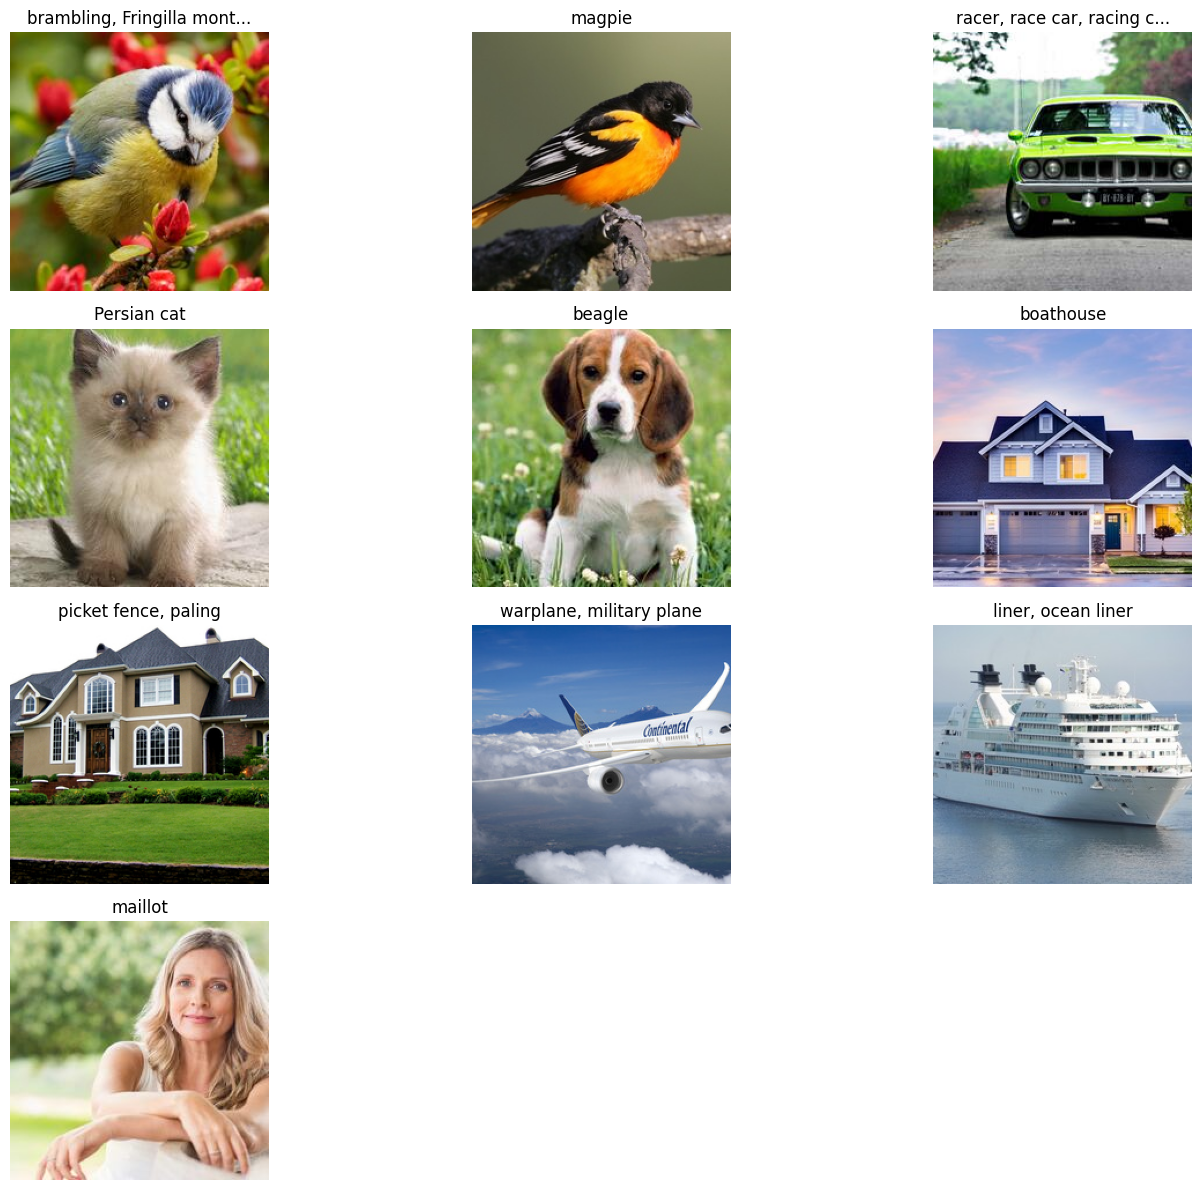

In [10]:
o = model.predict(x)
y = np.argmax(o,axis=1)
draw_images(x.astype(np.uint8),y, imagenet_labels )

In [11]:
# !mkdir -p ../data/imagenet
# !wget -P ../data/imagenet -c https://storage.googleapis.com/tensorflow/keras-applications/vgg16/vgg16_weights_tf_dim_ordering_tf_kernels.h5

# WEIGHTS_VGG16='data/imagenet/vgg16_weights_tf_dim_ordering_tf_kernels.h5'
# model = VGG16(weights=WEIGHTS_VGG16)